In [278]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

In [279]:
df = pd.read_csv('customer_churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [280]:
df.info()
df.drop(columns=['customerID'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<h3 style="text-align: center; font-family: 'Times New Roman'"> Data analysis and preprocessing </h3>

In [281]:
sns.set_style('darkgrid')

PALETTE = "Set2"
sns.set_palette(PALETTE)
sns.color_palette(PALETTE)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [282]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [283]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

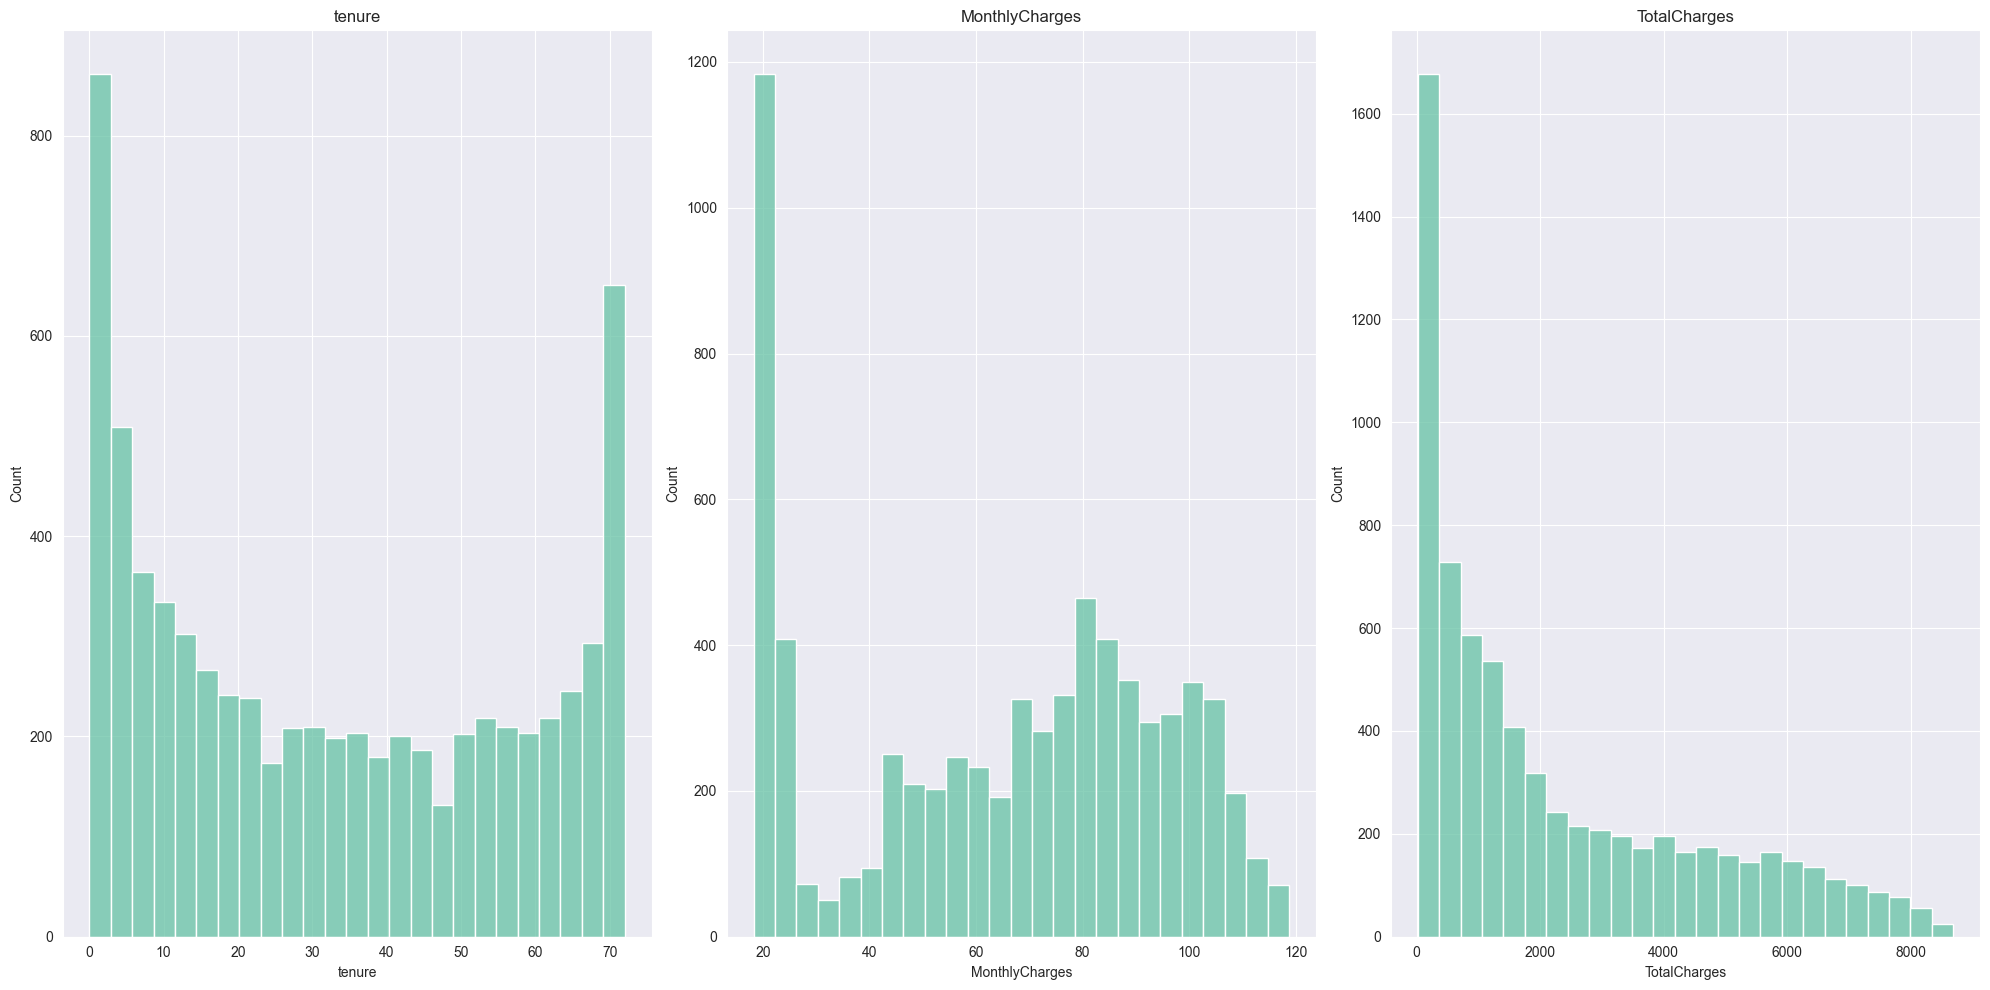

In [284]:
fig, axes = plt.subplots(1, 3, figsize=(20,10))
axes = axes.flatten()
for i, column in enumerate(numerical_columns):
    sns.histplot(data=df,
                 x=column,
                 bins=25,
                 ax=axes[i],
                 kde=False
                 )
    axes[i].set_title(column)
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(column)
plt.tight_layout()
plt.show()

In [285]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


<div style="font-family: 'Times New Roman'; font-size: 16px;">

**1.Tenure** time that client was with company:
- mean is 32 month ~ 2.7 years
- min is 1 month and max is 72 month
- std is 24 month

**2.Monthly Charges** amount of money client paid each month
- mean is $64
- min is $18 and max is $118
- std is $30

**3.Total Charges** total amount of money client paid
- mean is $2283 
- min is $18 and max is $8684
- std is $2266

we can see that total charges is related to tenure and monthly charges
</div>

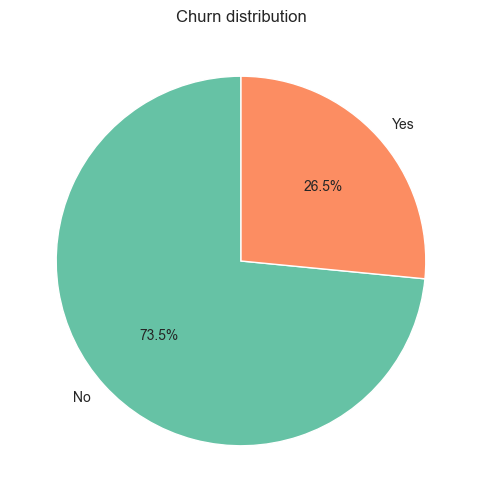

In [286]:
churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn distribution')
plt.show()

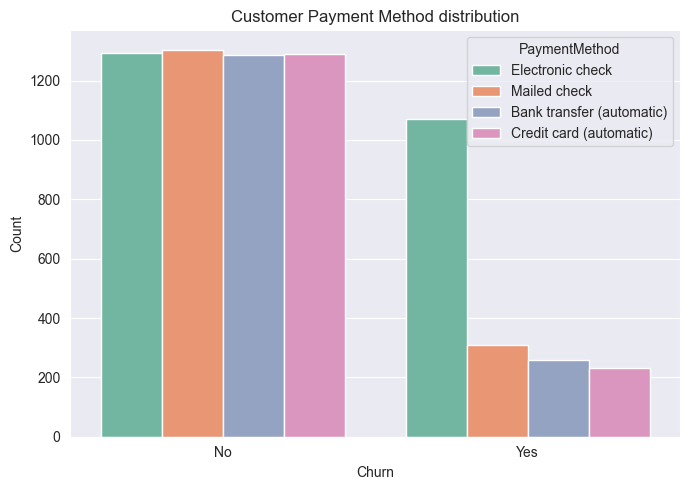

In [287]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="PaymentMethod")
plt.title("Customer Payment Method distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

those who pay by electronic check are most likely to churn

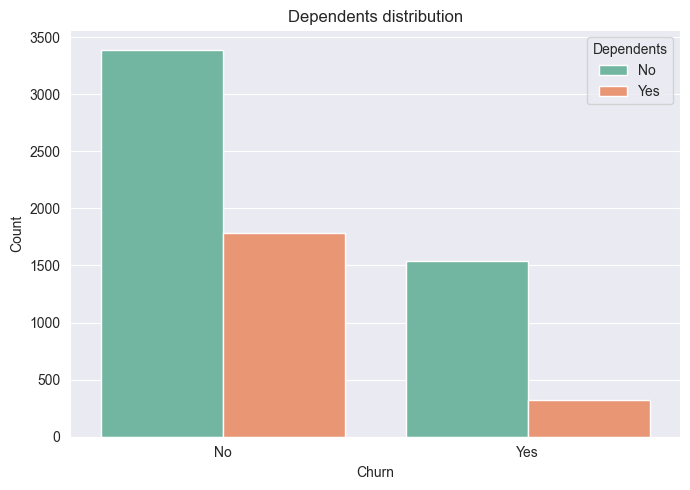

In [288]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="Dependents")
plt.title("Dependents distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

those who are without dependents are most likely to churn

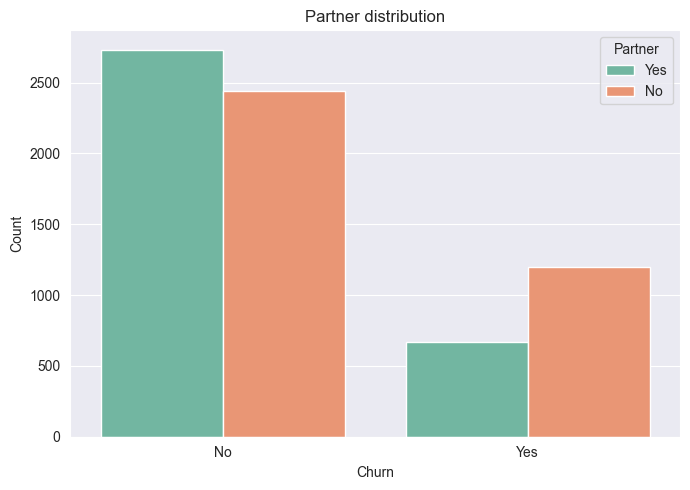

In [289]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="Partner")
plt.title("Partner distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

those who have partners are most likely to churn

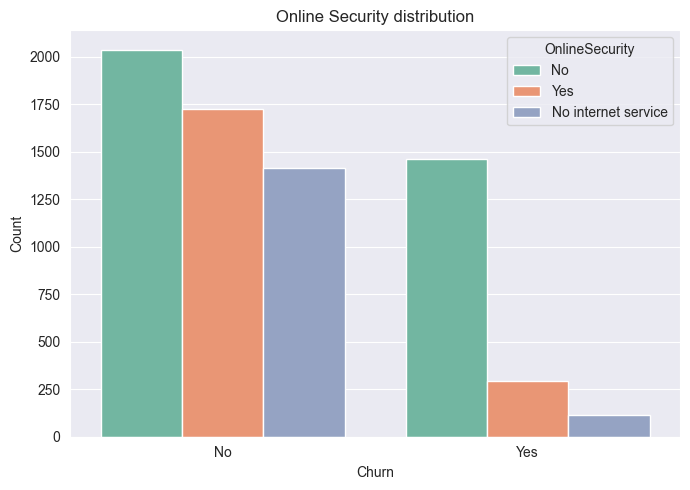

In [290]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="OnlineSecurity")
plt.title("Online Security distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

those who dont have online security are most likely to churn

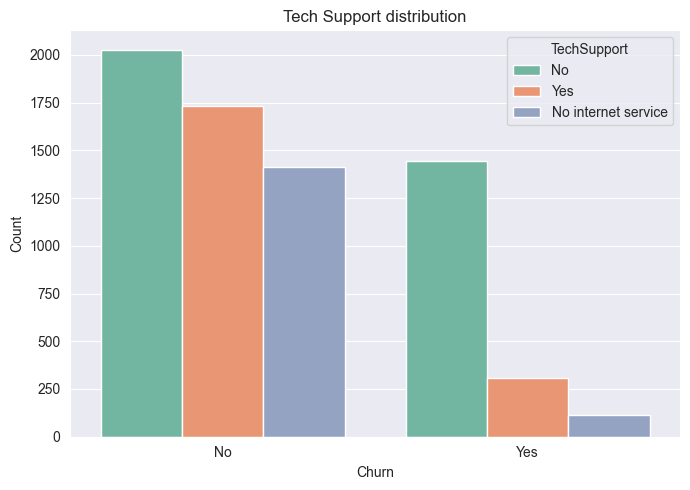

In [291]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="TechSupport")
plt.title("Tech Support distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

those who have no tech support are most likely to churn

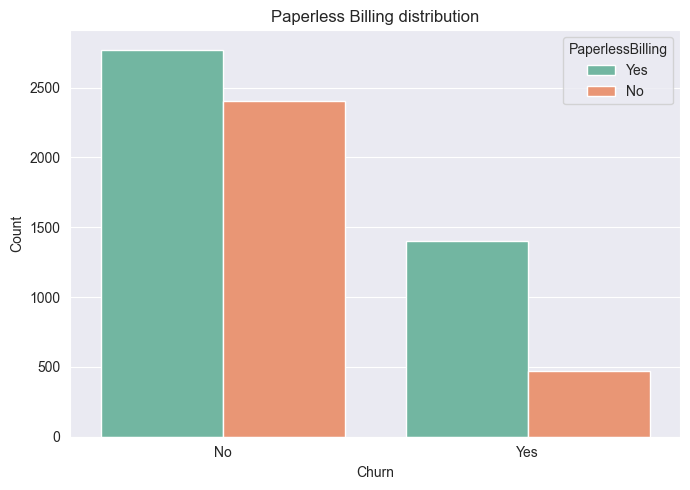

In [292]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="PaperlessBilling")
plt.title("Paperless Billing distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

> those with paperless billing are most likely to churn

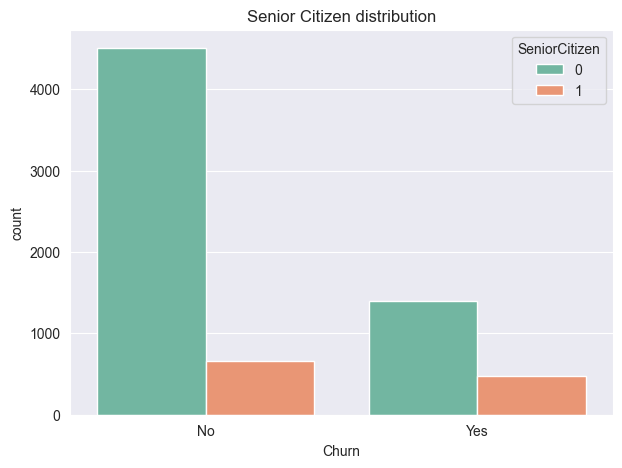

In [293]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Churn', hue='SeniorCitizen')
plt.title("Senior Citizen distribution")
plt.show()

> senior citizens most likely to churn

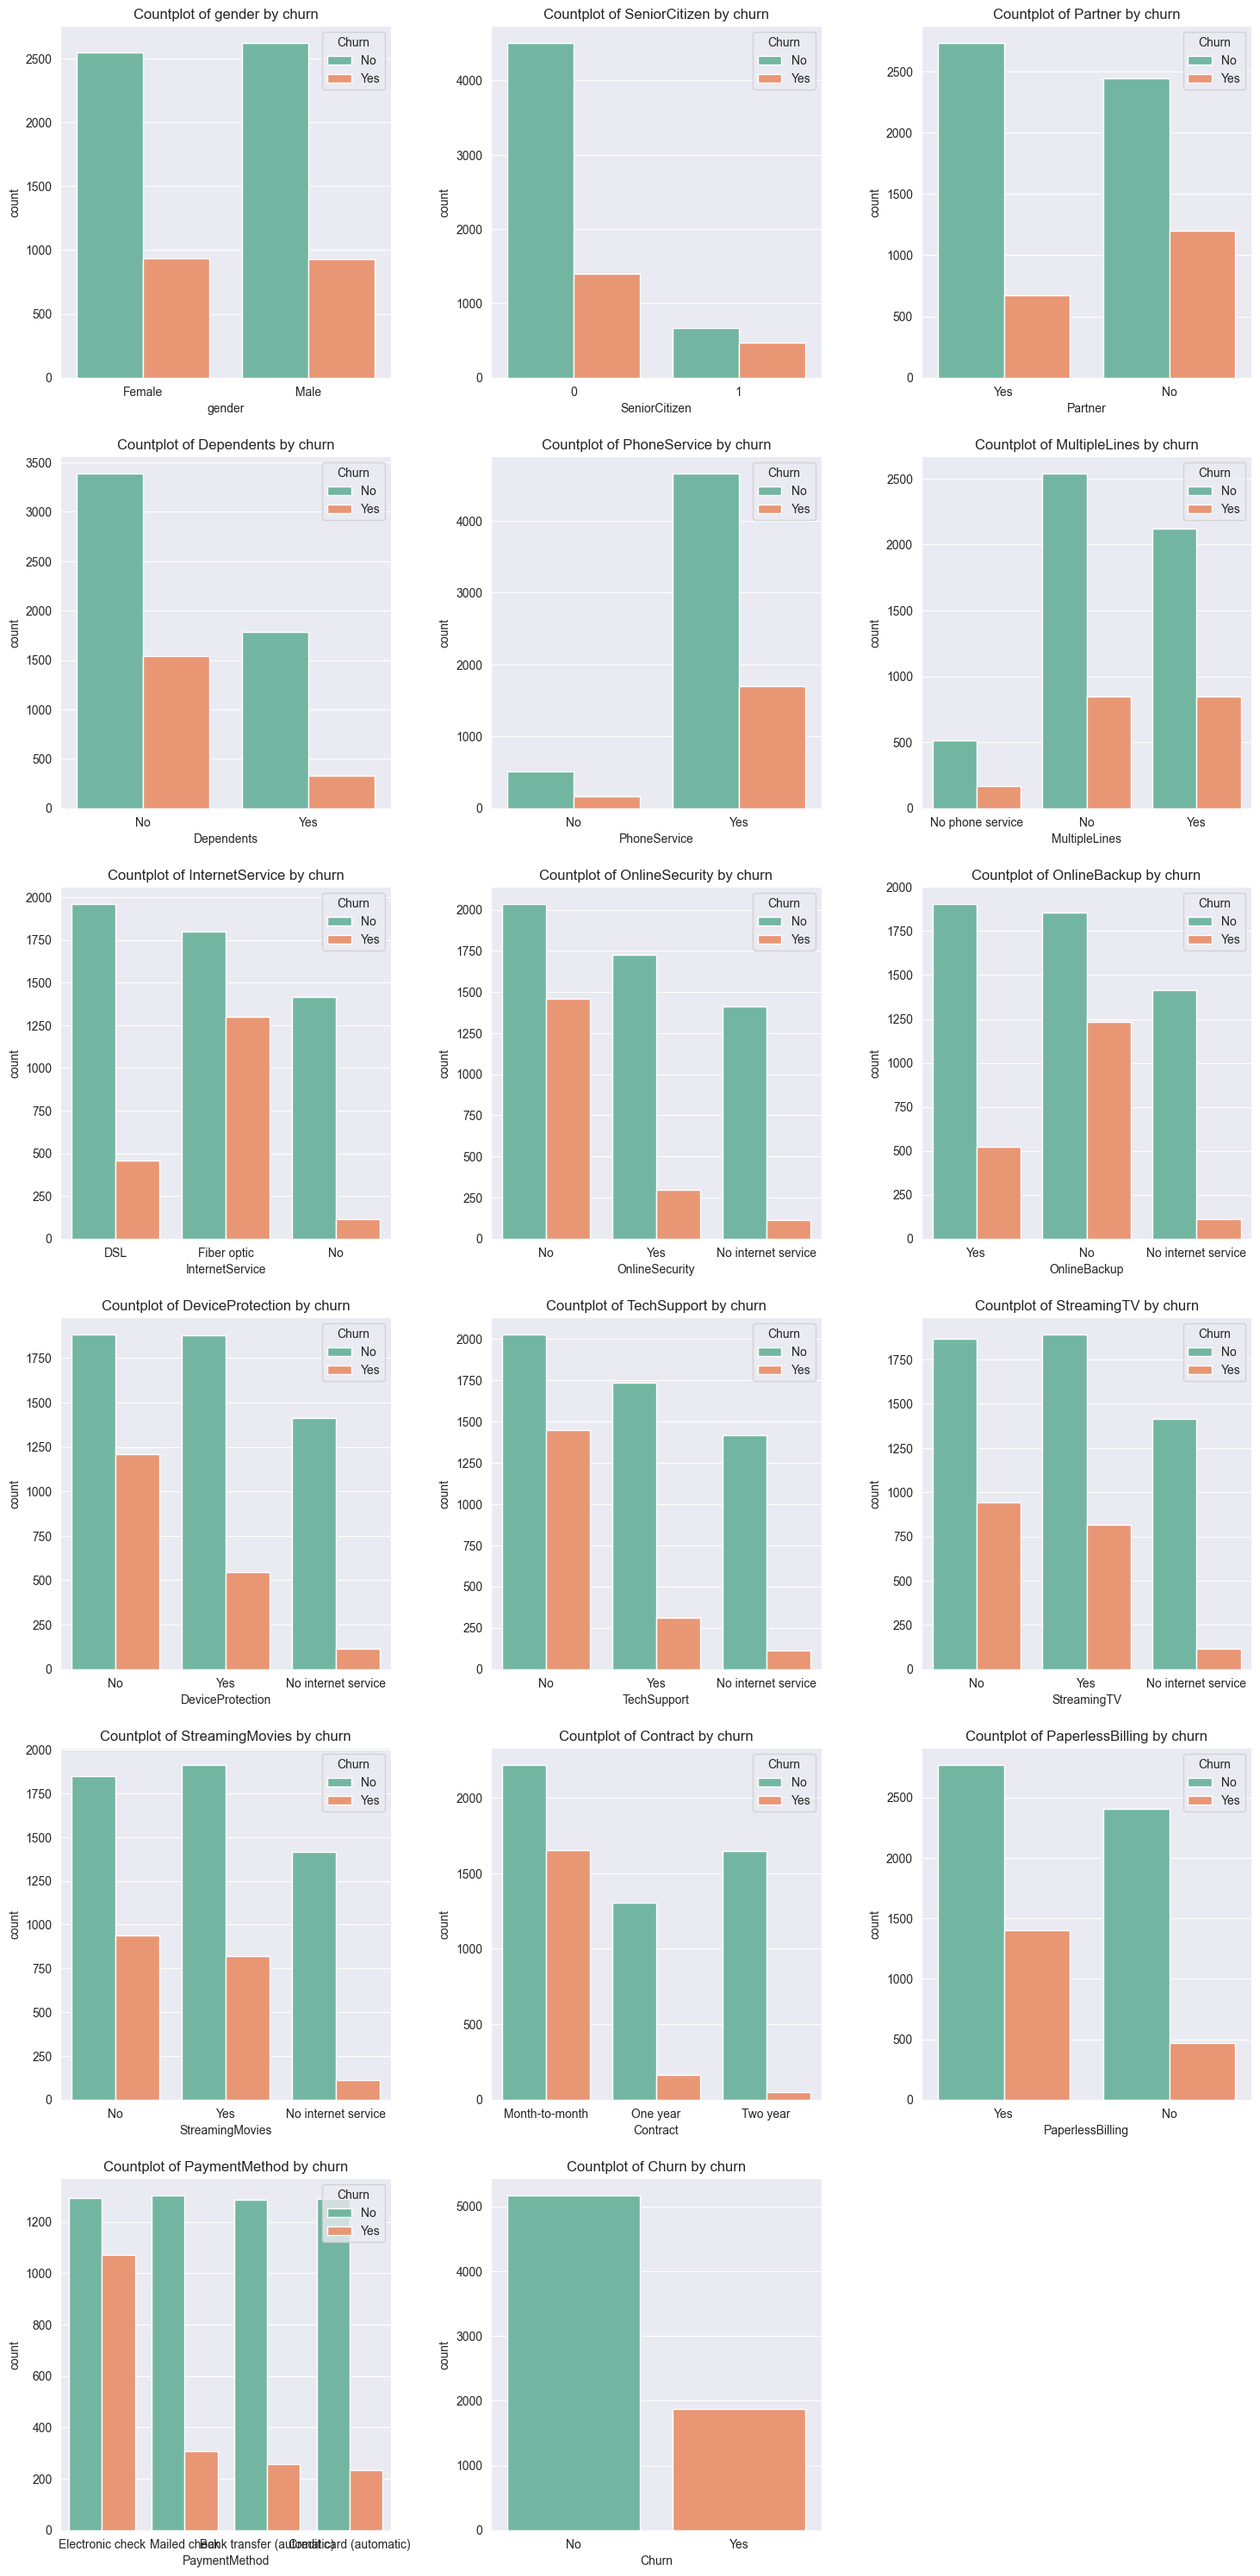

In [294]:
categorical_columns = df.select_dtypes(include=['object'])
cols = 3 # charts per row
rows = math.ceil(len(categorical_columns) / cols)

plt.figure(figsize=(5 * cols, 5 * rows))

for i, col in enumerate(categorical_columns):
    plt.subplot(rows, cols, i+1)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Countplot of {col} by churn')
plt.tight_layout(pad=2)
plt.show()

In [295]:
for column in categorical_columns:
    print(f"{column} values: {df[column].unique()}")

gender values: ['Female' 'Male']
SeniorCitizen values: [0 1]
Partner values: ['Yes' 'No']
Dependents values: ['No' 'Yes']
PhoneService values: ['No' 'Yes']
MultipleLines values: ['No phone service' 'No' 'Yes']
InternetService values: ['DSL' 'Fiber optic' 'No']
OnlineSecurity values: ['No' 'Yes' 'No internet service']
OnlineBackup values: ['Yes' 'No' 'No internet service']
DeviceProtection values: ['No' 'Yes' 'No internet service']
TechSupport values: ['No' 'Yes' 'No internet service']
StreamingTV values: ['No' 'Yes' 'No internet service']
StreamingMovies values: ['No' 'Yes' 'No internet service']
Contract values: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling values: ['Yes' 'No']
PaymentMethod values: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn values: ['No' 'Yes']


In [296]:
binary_columns = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
ohe_columns = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod']
ordinal_columns = ['InternetService', 'Contract']

In [297]:
ohe_encoder = OneHotEncoder(
    drop="first",
    sparse_output=False,
    handle_unknown="ignore"
)

ohe_encoded = ohe_encoder.fit_transform(df[ohe_columns])

ohe_df = pd.DataFrame(
    ohe_encoded,
    index=df.index,
    columns=ohe_encoder.get_feature_names_out(ohe_columns)
)

df = pd.concat([df.drop(columns=ohe_columns), ohe_df], axis=1)

In [298]:
categories = [
    ['No', 'DSL', 'Fiber optic'],
    ['Month-to-month', 'One year', 'Two year']
]
ordinal_encoder = OrdinalEncoder(categories=categories)
ordinal_encoder.fit(df[ordinal_columns])
df[ordinal_columns] = ordinal_encoder.transform(df[ordinal_columns])

In [299]:
df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0}).astype(int)
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0}).astype(int)

/var/folders/bc/jgqfymlj25b557vc62ph2xrc0000gn/T/ipykernel_30575/460097717.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/var/folders/bc/jgqfymlj25b557vc62ph2xrc0000gn/T/ipykernel_30575/460097717.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   InternetService                        7043 non-null   float64
 7   Contract                               7043 non-null   float64
 8   PaperlessBilling                       7043 non-null   int64  
 9   MonthlyCharges                         7043 non-null   float64
 10  TotalCharges                           7032 non-null   float64
 11  Chur

In [301]:
print(df.select_dtypes(include="object").columns)
print(df.isnull().sum())


Index([], dtype='object')
gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
InternetService                           0
Contract                                  0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
Stream

In [302]:
df.dropna(inplace=True)

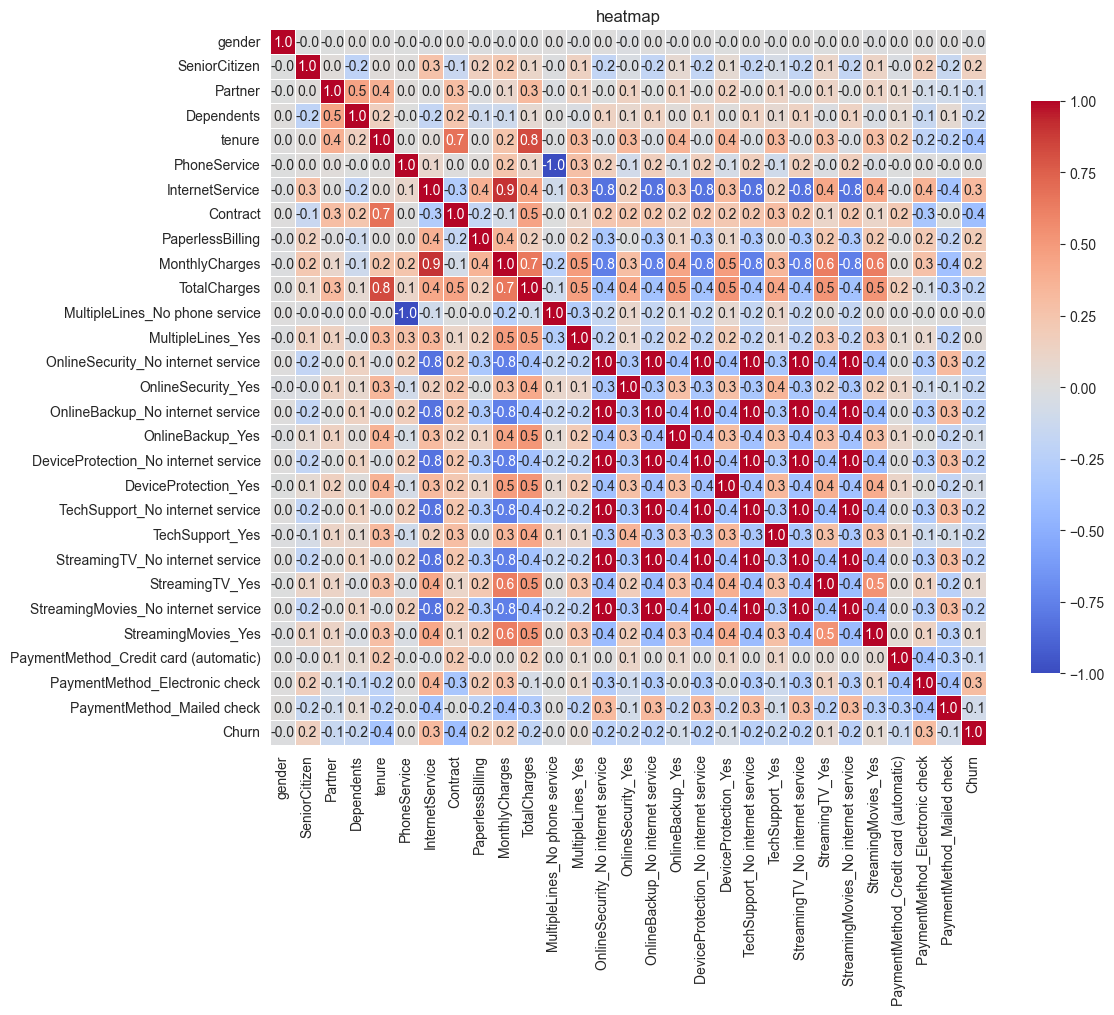

In [306]:
x = df.drop(columns=['Churn'])
y = df['Churn']

corr_matrix = x.copy()
corr_matrix['Churn'] = y
corr = corr_matrix.corr()

plt.figure(figsize=(12,10))

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(
    corr,
    cmap='coolwarm',
    center=0,
    annot=True,
    fmt='.1f',
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': .8}
)
plt.title('heatmap')
plt.tight_layout()
plt.show()